# IRIS Dataset - EDA, Cleaning & Transformation

This notebook performs:
1. Loading the IRIS dataset
2. Exploratory Data Analysis (EDA)
3. Data Cleaning
4. Data Transformations
5. Exporting the final cleaned dataset

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

## 1. Load the IRIS Dataset

In [2]:
# Load the IRIS dataset from sklearn
iris = load_iris()

# Create a DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species_name'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Rename columns for easier handling
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species', 'species_name']

print("Dataset loaded successfully!")
print(f"\nDataset Shape: {df.shape}")
print(f"\nFirst 5 rows:")
df.head()

Dataset loaded successfully!

Dataset Shape: (150, 6)

First 5 rows:


,sepal_length,sepal_width,petal_length,petal_width,species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


## 2. Exploratory Data Analysis (EDA)

In [3]:
# Basic information about the dataset
print("Dataset Information:")
print("=" * 50)
df.info()

print("\n" + "=" * 50)
print("\nStatistical Summary:")
print("=" * 50)
df.describe()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int32  
 5   species_name  150 non-null    object 
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB


Statistical Summary:


,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [4]:
# Check for missing values
print("Missing Values:")
print("=" * 50)
missing = df.isnull().sum()
print(missing)
print(f"\nTotal missing values: {missing.sum()}")

Missing Values:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
species_name    0
dtype: int64

Total missing values: 0


Class Distribution:
species_name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


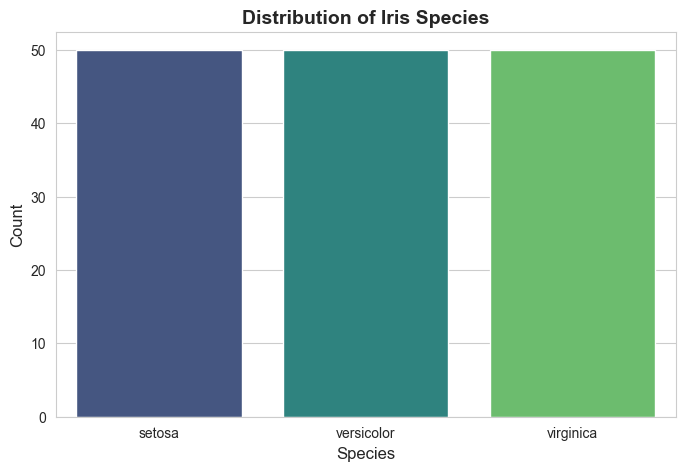

In [5]:
# Check class distribution
print("Class Distribution:")
print("=" * 50)
print(df['species_name'].value_counts())

# Visualize class distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='species_name', palette='viridis')
plt.title('Distribution of Iris Species', fontsize=14, fontweight='bold')
plt.xlabel('Species', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

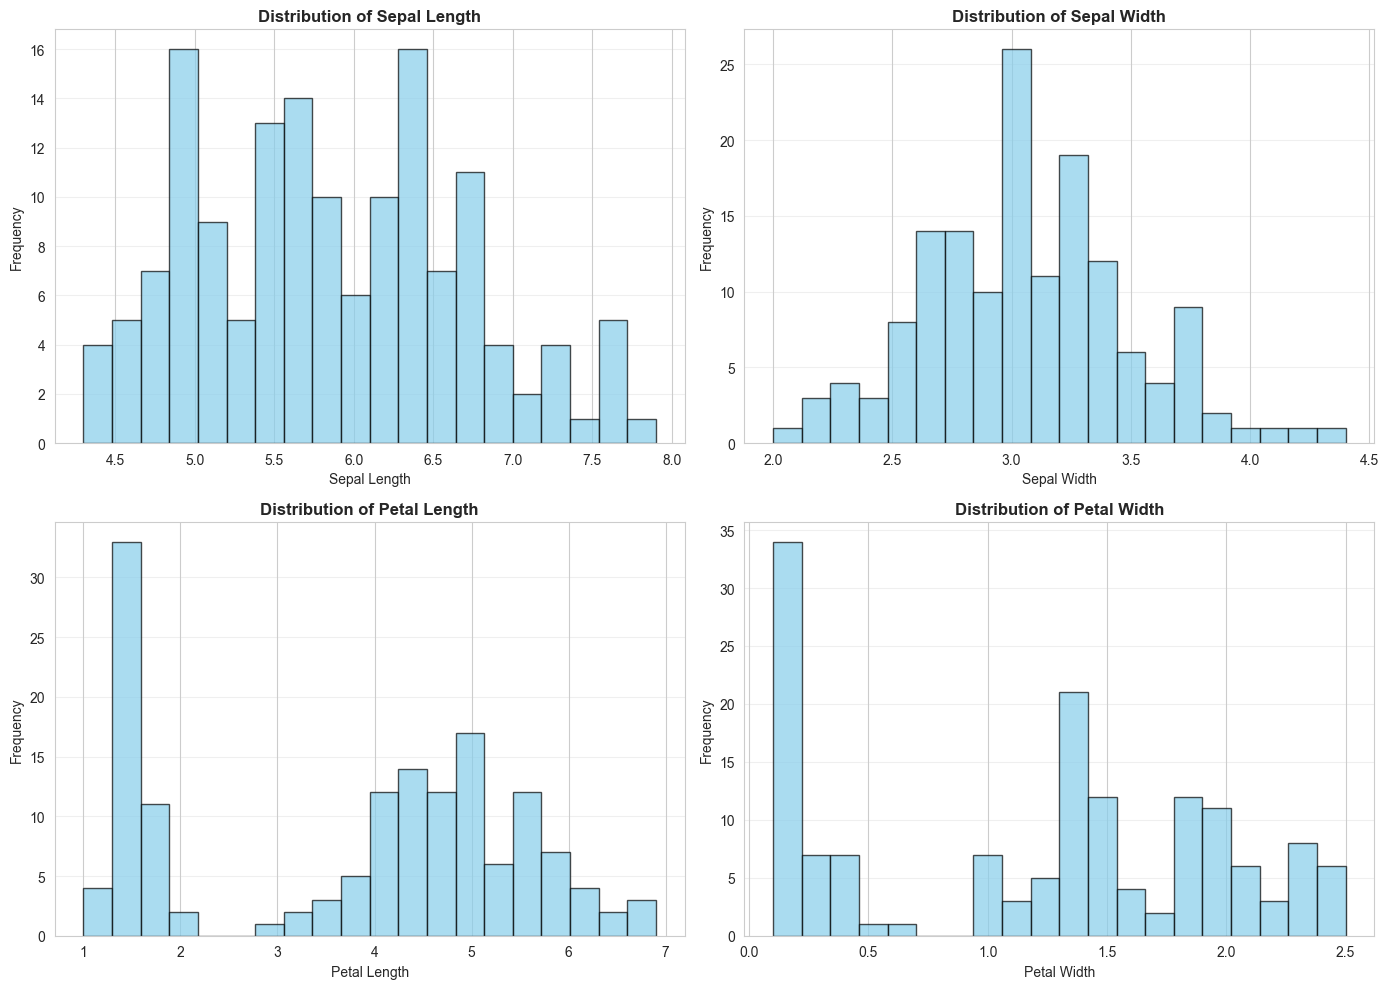

In [6]:
# Distribution of features
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

for idx, feature in enumerate(features):
    row = idx // 2
    col = idx % 2
    axes[row, col].hist(df[feature], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    axes[row, col].set_title(f'Distribution of {feature.replace("_", " ").title()}', fontsize=12, fontweight='bold')
    axes[row, col].set_xlabel(feature.replace("_", " ").title(), fontsize=10)
    axes[row, col].set_ylabel('Frequency', fontsize=10)
    axes[row, col].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

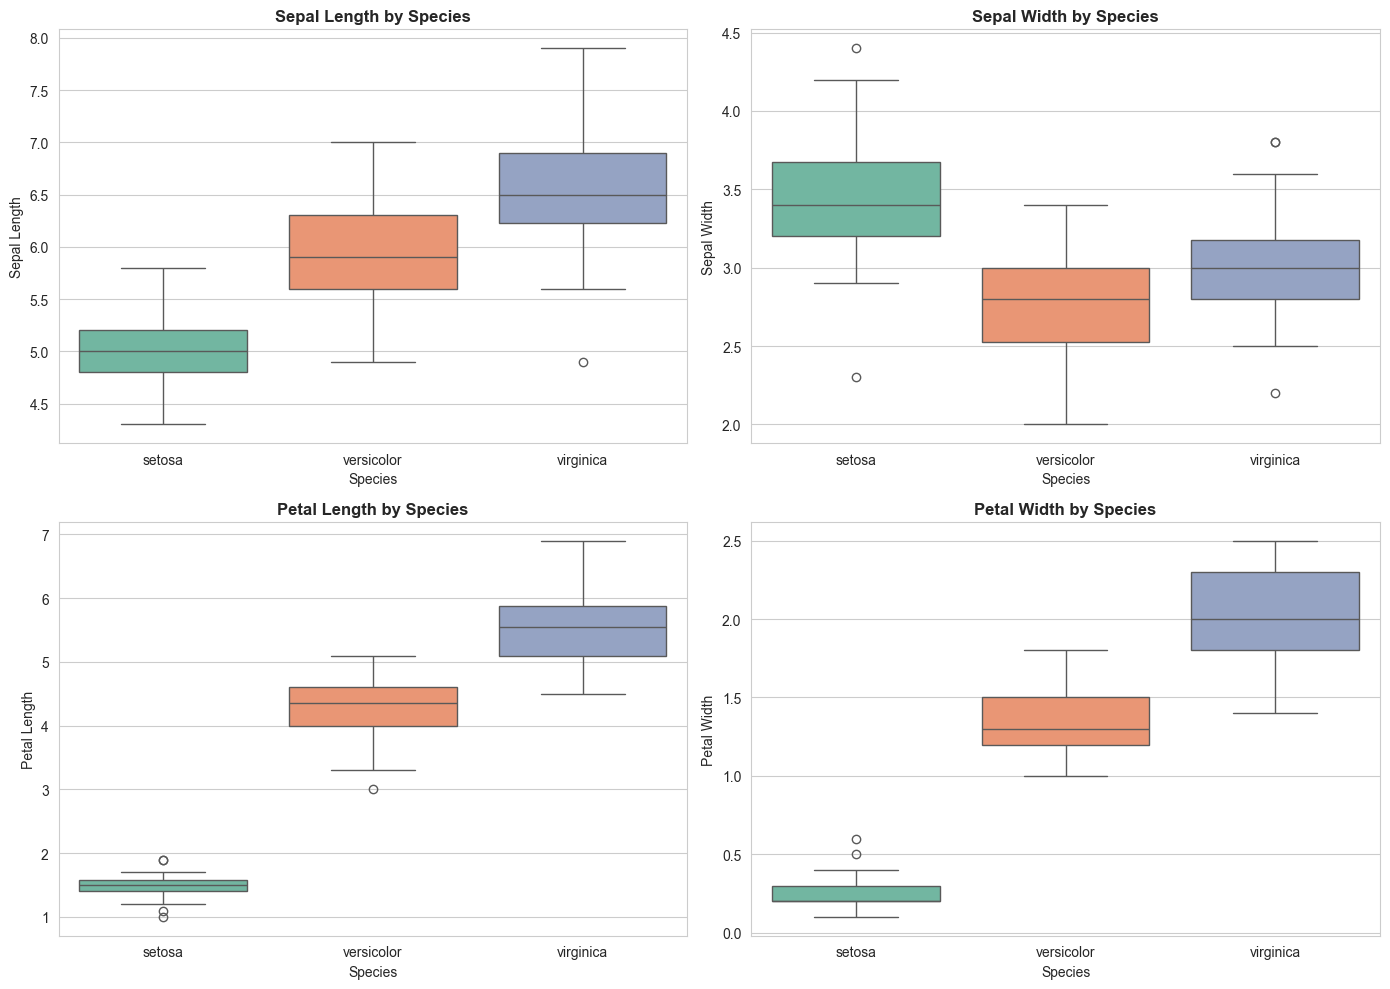

In [7]:
# Box plots to check for outliers
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for idx, feature in enumerate(features):
    row = idx // 2
    col = idx % 2
    sns.boxplot(data=df, y=feature, x='species_name', palette='Set2', ax=axes[row, col])
    axes[row, col].set_title(f'{feature.replace("_", " ").title()} by Species', fontsize=12, fontweight='bold')
    axes[row, col].set_xlabel('Species', fontsize=10)
    axes[row, col].set_ylabel(feature.replace("_", " ").title(), fontsize=10)

plt.tight_layout()
plt.show()

<Figure size 1200x1000 with 0 Axes>

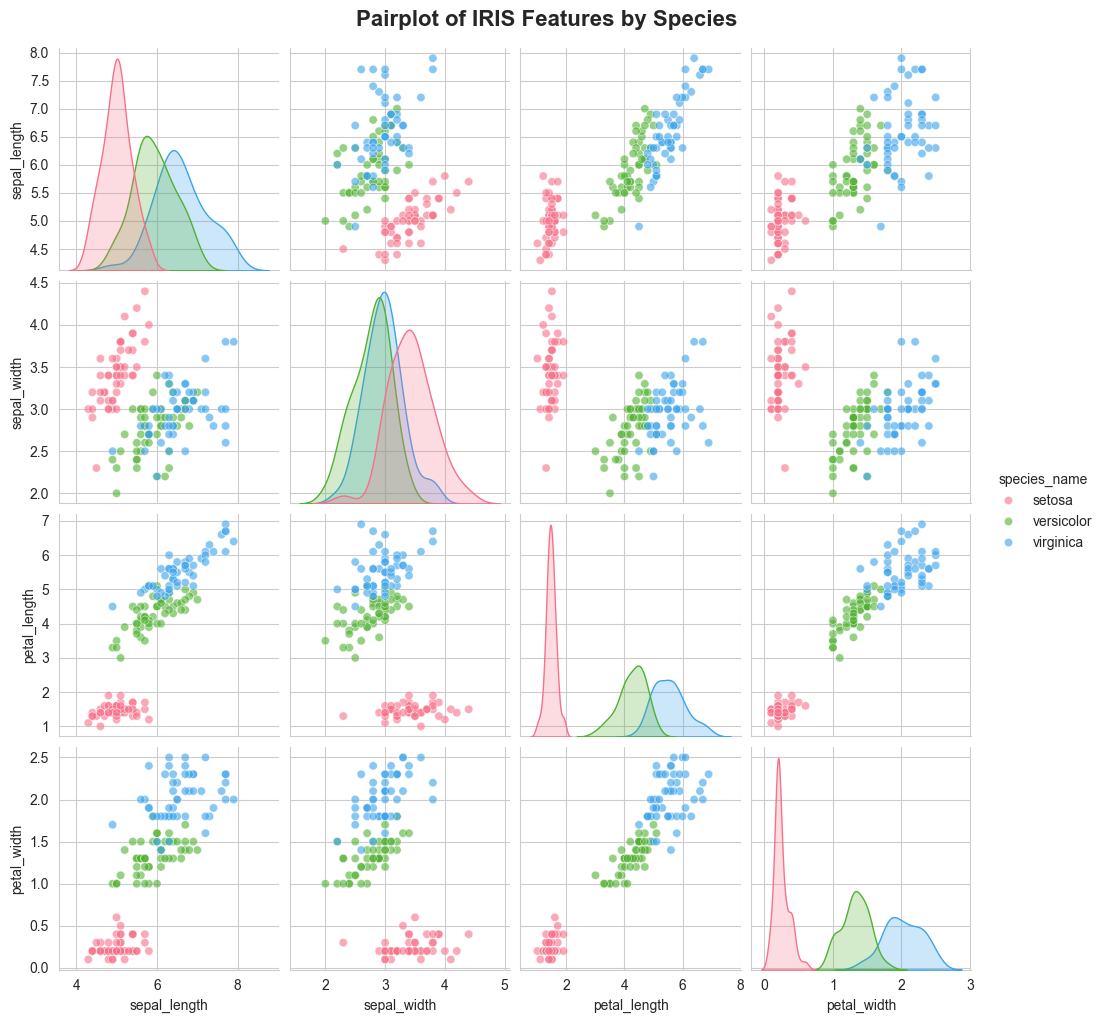

In [8]:
# Pairplot to visualize relationships
plt.figure(figsize=(12, 10))
sns.pairplot(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species_name']], 
             hue='species_name', palette='husl', diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pairplot of IRIS Features by Species', y=1.02, fontsize=16, fontweight='bold')
plt.show()

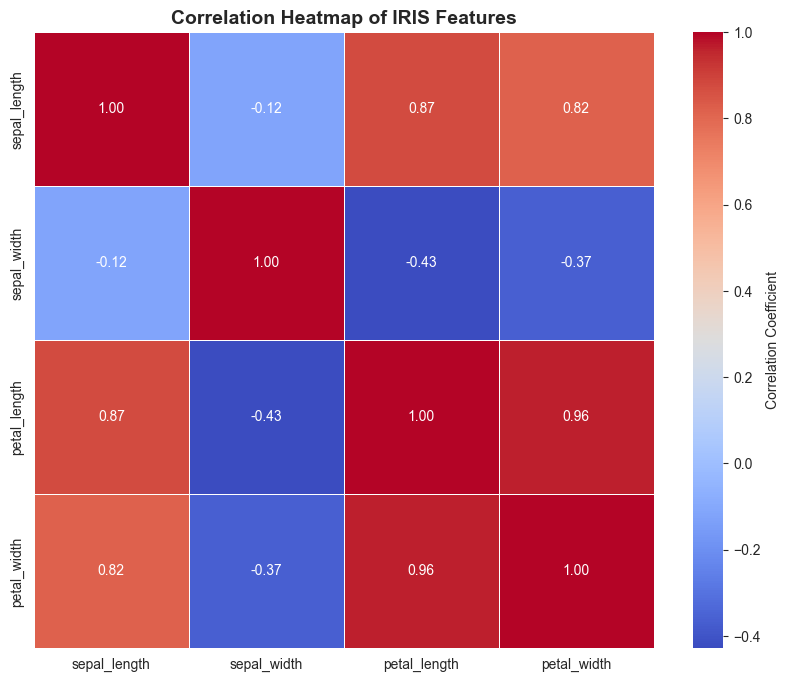


Correlation Matrix:
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000


In [9]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, 
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Heatmap of IRIS Features', fontsize=14, fontweight='bold')
plt.show()

print("\nCorrelation Matrix:")
print(correlation_matrix)

## 3. Data Cleaning

### Key Findings from EDA:
- No missing values detected
- Balanced classes (50 samples per species)
- Some potential outliers but they appear to be valid data points
- Strong correlation between petal length and petal width

In [10]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

if duplicates > 0:
    print(f"\nRemoving {duplicates} duplicate rows...")
    df_cleaned = df.drop_duplicates()
    print(f"Dataset shape after removing duplicates: {df_cleaned.shape}")
else:
    df_cleaned = df.copy()
    print("\nNo duplicates found. Dataset is clean!")

Number of duplicate rows: 1

Removing 1 duplicate rows...
Dataset shape after removing duplicates: (149, 6)


In [11]:
# Check for any anomalous values
print("Checking for negative values or zeros:")
print("=" * 50)
for feature in features:
    neg_count = (df_cleaned[feature] <= 0).sum()
    print(f"{feature}: {neg_count} negative/zero values")

print("\nAll values are positive. Data is valid!")

Checking for negative values or zeros:
sepal_length: 0 negative/zero values
sepal_width: 0 negative/zero values
petal_length: 0 negative/zero values
petal_width: 0 negative/zero values

All values are positive. Data is valid!


## 4. Data Transformation

In [12]:
# Create final dataset with only necessary columns
final_df = df_cleaned[['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']].copy()

print("Final Dataset Shape:", final_df.shape)
print("\nFirst 5 rows of cleaned dataset:")
print(final_df.head())

print("\nLast 5 rows of cleaned dataset:")
print(final_df.tail())

print("\nDataset Summary:")
print(final_df.describe())

Final Dataset Shape: (149, 5)

First 5 rows of cleaned dataset:
   sepal_length  sepal_width  petal_length  petal_width  species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0

Last 5 rows of cleaned dataset:
     sepal_length  sepal_width  petal_length  petal_width  species
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2

Dataset Summary:
       sepal_length  sepal_width  petal_length  petal_width     species
count    149.000000  

## 5. Export Cleaned Dataset

In [13]:
# Save the cleaned dataset
import os

# Create models directory if it doesn't exist
os.makedirs('../models', exist_ok=True)

# Export to CSV
final_df.to_csv('../models/cleaned_iris_dataset.csv', index=False)

print("✓ Cleaned dataset exported successfully to '../models/cleaned_iris_dataset.csv'")
print(f"\nFinal dataset contains {len(final_df)} samples with {len(final_df.columns)} features")
print("\nDataset is ready for model training!")

✓ Cleaned dataset exported successfully to '../models/cleaned_iris_dataset.csv'

Final dataset contains 149 samples with 5 features

Dataset is ready for model training!


## Summary

### Key Insights:
1. **Dataset Size**: 150 samples, 4 features
2. **Classes**: 3 species (Setosa, Versicolor, Virginica) - perfectly balanced
3. **Data Quality**: No missing values, no duplicates, all valid positive measurements
4. **Feature Correlations**: 
   - Strong positive correlation between petal length and petal width
   - Petal measurements show better species separation than sepal measurements
5. **Species Characteristics**:
   - Setosa: Smallest petals, easily distinguishable
   - Versicolor: Medium-sized petals
   - Virginica: Largest petals

### Next Steps:
- Train multiple classification models (Logistic Regression, Decision Tree, Naive Bayes, etc.)
- Compare model performances
- Build a Streamlit app for interactive predictions